In [1]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.patches as patches
% matplotlib inline

In [2]:
def vel(keyword,T,ENG):
    'design to obtain velocity field'
    if keyword =='T':
        nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/data_eng3/*%s*%s*.nc'%(ENG,T)))
        uvel=nc.Dataset(nc_filename[0])
        data =uvel.variables['votemper'][0,:,400:,:]
    else:
        nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/data_eng3/*%s*%s*.nc'%(ENG,T)))
        vvel=nc.Dataset(nc_filename[0])
        data =vvel.variables['vosaline'][0,:,400:,:]
   
    data =np.ma.masked_where(tmask==0,data)
    return data

In [3]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/min_ice/nasaRun/Y*2008*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))
ptrc=nc.Dataset(nc_filename[0])

nav_lon=ptrc.variables['nav_lon'][:,:]
nav_lat=ptrc.variables['nav_lat'][:,:]
dep = ptrc.variables['deptht'][:]


tmask=nc.Dataset(
        '/ocean/xiaoxiny/research/data/mesh_mask_anha4_201509.nc')
mbathy=tmask.variables['mbathy'][0,400:,:]
tmask=tmask.variables['tmask'][0,:,400:,:]


bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]


found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/min_ice/nasaRun/Y19682008.nc']


In [4]:
def map():
    m = Basemap(width =2e6,height =1e6,lon_0=-150, lat_0=73,
            projection='stere', resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,80.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
    x_lon,y_lat = m(lon,lat)
    nemo_lon,nemo_lat = m(nav_lon,nav_lat)
    m.plot(nemo_lon[::10,::10],nemo_lat[::10,::10],nemo_lon.T[::10,::10],nemo_lat.T[::10,::10],color='k',linewidth=0.1)
    #m.plot(x_lon[::100,::10].T,y_lat[::100,::10].T,color='b')
    cs=m.contour(nemo_lon,nemo_lat,bathy,linewidth=0.075,colors='black',alpha=0.3)
    return m,np.array(x_lon),np.array(y_lat),nemo_lon,nemo_lat


In [5]:
import xlrd
book = xlrd.open_workbook("/ocean/xiaoxiny/research/result_jasper/data_eng3/CTD_2010.xlsx") #open our xls file, there's lots of extra default options in this call, for logging etc. take a look at the docs
 
sheet = book.sheets()[0] #book.sheets() returns a list of sheet objects... alternatively...
sheet = book.sheet_by_name("Sheet 1") #we can pull by name
sheet = book.sheet_by_index(0) #or by the index it has in excel's sheet collection
 
r = sheet.row(0) #returns all the CELLS of row 0,
print(r)
c = sheet.col_values(0) #returns all the VALUES of row 0,

Data = [] #make a data store
for i in range(sheet.nrows):
    Data.append(sheet.row_values(i))

[text:'CruiseId', text:'EXPOCODE', text:'STNNBR', text:'BTLNBR', text:'DATE', text:'TIME', text:'LATITUDE', text:'LONGITUDE', text:'DEPTH', text:'CTDPRS', text:'CTDTMP', text:'CTDSAL', text:'ALKALI', text:'ALKALI_FLAG_W', text:'TCARBN', text:'TCARBN_FLAG_W', text:'PH_WS', text:'PH_WS_FLAG_W']


In [6]:
sal=[]
tem=[]
lon=[]
lat=[]
stn=[]
data2=np.copy(Data)
for i in range (2,len(data2[:,8])):
        stn.append(float(data2[i,2]))
        sal.append(float(data2[i,11]))
        tem.append(float(data2[i,10]))
        lon.append(float(data2[i,7]))
        lat.append(float(data2[i,6]))

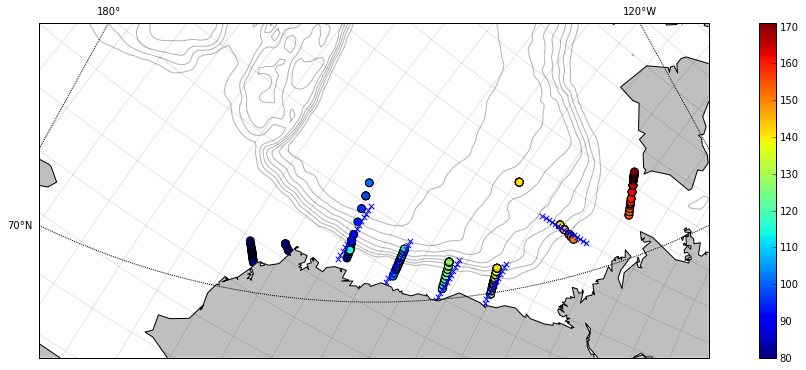

In [7]:
data2=np.copy(Data)
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot()
m,x_lon,y_lat,nemo_lon,nemo_lat=map()
m.scatter(x_lon,y_lat,c=stn,s=60,vmin=80);plt.colorbar()

a=np.array([315,320,322,320])
b=np.array([161,172,185,198])
for i in range (len(a)):
    m.scatter(nemo_lon[a[i]:a[i]+15,b[i]],nemo_lat[a[i]:a[i]+15,b[i]],marker='x',s=30)
#orange
a_=300;b_=145
m.scatter(nemo_lon[a_,b_:b_+15],nemo_lat[a_,b_:b_+15],marker='x',s=30)

In [8]:
# select data has depth > 400m 

sal=[]
tem=[]
lon=[]
lat=[]
data2=np.copy(Data)
for i in range (2,len(data2[:,8])):
    if float(data2[i,8])>400:#400-500
        sal.append(float(data2[i,11]))
        tem.append(float(data2[i,10]))
        lon.append(float(data2[i,7]))
        lat.append(float(data2[i,6]))

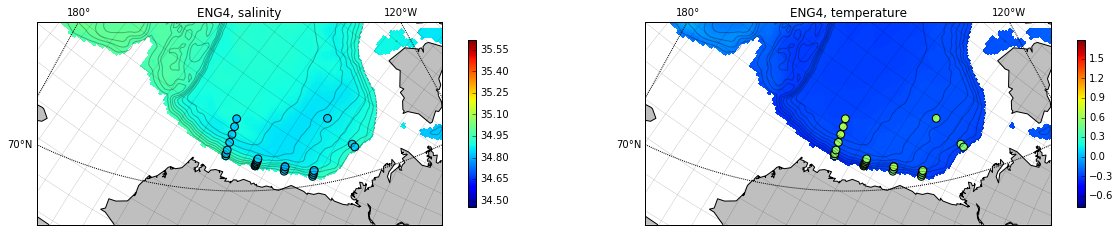

In [10]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
m,x_lon,y_lat,nemo_lon,nemo_lat=map()

data=vel('S','2010m','ENG4')
m.pcolor(nemo_lon,nemo_lat,data[30,:,:],vmin=np.min(data[30,:,:]),vmax=np.max(data[30,:,:]))
plt.colorbar(shrink=0.3)
m.scatter(x_lon,y_lat,c=sal,s=60,vmin=np.min(data[30,:,:]),vmax=np.max(data[30,:,:]))
plt.title('ENG4, salinity')

ax = fig.add_subplot(122)
m,x_lon,y_lat,nemo_lon,nemo_lat=map()

data=vel('T','2010m','ENG4')

m.pcolor(nemo_lon,nemo_lat,data[30,:,:],vmin=np.min(data[30,:,:]),vmax=np.max(data[30,:,:])-8)
plt.colorbar(shrink=0.3)
m.scatter(x_lon,y_lat,c=tem,s=60,vmin=np.min(data[30,:,:]),vmax=np.max(data[30,:,:])-8)
plt.title('ENG4, temperature')



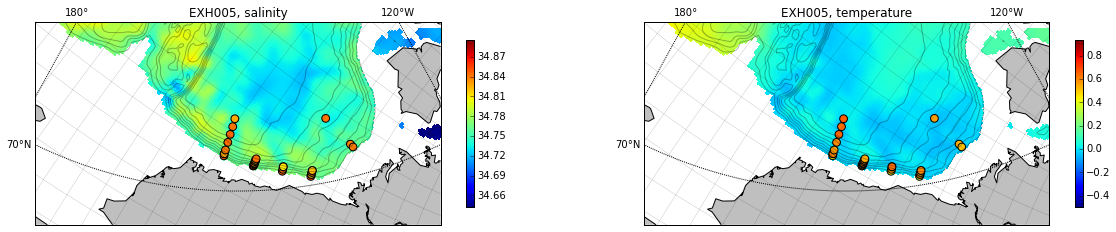

In [409]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
m,x_lon,y_lat,nemo_lon,nemo_lat=map()

data=vel('S','2010m','EXH005')
m.pcolor(nemo_lon,nemo_lat,data[30,:,:],vmin=np.min(data[30,:,:])+0.7,vmax=np.max(data[30,:,:])-0.5)
plt.colorbar(shrink=0.3)
m.scatter(x_lon,y_lat,c=sal,s=60,vmin=np.min(data[30,:,:])+0.7,vmax=np.max(data[30,:,:])-0.5)
plt.title('EXH005, salinity')

ax = fig.add_subplot(122)
m,x_lon,y_lat,nemo_lon,nemo_lat=map()

data=vel('T','2010m','EXH005')

m.pcolor(nemo_lon,nemo_lat,data[30,:,:],vmin=np.min(data[30,:,:]),vmax=np.max(data[30,:,:])-8)
plt.colorbar(shrink=0.3)
m.scatter(x_lon,y_lat,c=tem,s=60,vmin=np.min(data[30,:,:]),vmax=np.max(data[30,:,:])-8)
plt.title('EXH005, temperature')



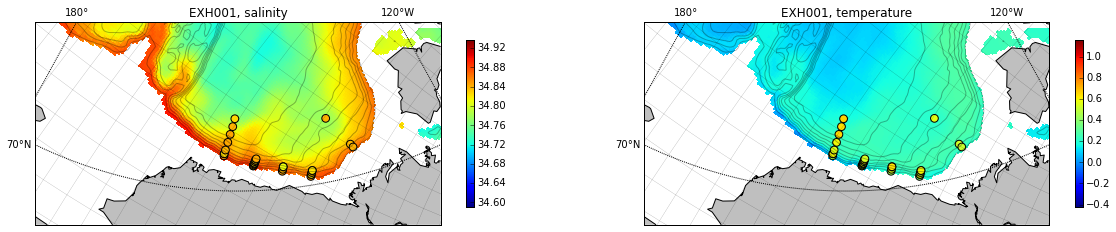

In [410]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
m,x_lon,y_lat,nemo_lon,nemo_lat=map()

data=vel('S','2010m','EXH001')
m.pcolor(nemo_lon,nemo_lat,data[30,:,:],vmin=np.min(data[30,:,:])+0.4,vmax=np.max(data[30,:,:])-0.75)
plt.colorbar(shrink=0.3)
m.scatter(x_lon,y_lat,c=sal,s=60,vmin=np.min(data[30,:,:])+0.4,vmax=np.max(data[30,:,:])-0.75)
plt.title('EXH001, salinity')

ax = fig.add_subplot(122)
m,x_lon,y_lat,nemo_lon,nemo_lat=map()

data=vel('T','2010m','EXH001')

m.pcolor(nemo_lon,nemo_lat,data[30,:,:],vmin=np.min(data[30,:,:])+0.1,vmax=np.max(data[30,:,:])-8)
plt.colorbar(shrink=0.3)
m.scatter(x_lon,y_lat,c=tem,s=60,vmin=np.min(data[30,:,:])+0.1,vmax=np.max(data[30,:,:])-8)
plt.title('EXH001, temperature')



In [11]:
def filerdata(Data,a,b,special='Flase'):
    sal=[]
    tem=[]
    lon=[]
    lat=[]
    depth=[]
    data2=np.copy(Data)
    if special=='Flase':
        latmin,latmax=nav_lat[a+15,b],nav_lat[a,b]
        lonmin,lonmax=nav_lon[a+15,b],nav_lon[a,b]
    else:
        latmin,latmax=nav_lat[a,b]-0.5,nav_lat[a,b+15]+0.5
        lonmin,lonmax=nav_lon[a,b+15],nav_lon[a,b]
        #print latmin,latmax,lonmin,lonmax
    for i in range (2,len(data2[:,8])):   
        
        if float(data2[i,7])<lonmax and float(data2[i,7])>lonmin and \
           float(data2[i,6])<latmax and float(data2[i,6])>latmin:
            sal.append(float(data2[i,11]))
            tem.append(float(data2[i,10]))
            depth.append(float(data2[i,9]))
            lon.append(float(data2[i,7]))
            lat.append(float(data2[i,6]))
    return lat,lon,depth,sal,tem

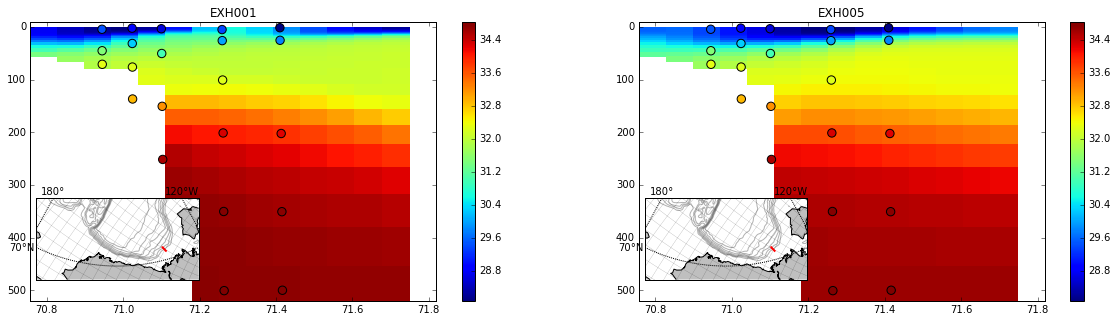

In [14]:
a_=300
b_=145

fig = plt.figure(figsize=(20,5))
ax=plt.subplot(121)
data=vel('S','2010m','EXH001') 

plt.pcolor(nav_lat[a_,b_:b_+15],dep,data[:,a_,b_:b_+15])
lat,lon,depth,sal,tem=filerdata(Data,a_,b_,special='True')
plt.scatter(lat,depth,c=sal,s=70);plt.colorbar()

plt.ylim(-10,520);plt.xlim(nav_lat[a_,b_],nav_lat[a_,b_+15])
plt.gca().invert_yaxis();plt.title('EXH001')
# add inset
axin = inset_axes(ax, width='40%', height='40%', loc=3)
m,x_lon,y_lat,nemo_lon,nemo_lat=map()
m.plot(x_lon,y_lat,c='r',lw=2)

ax=plt.subplot(122)
data=vel('S','2010m','EXH005') 
plt.pcolor(nav_lat[a_,b_:b_+15],dep,data[:,a_,b_:b_+15])
lat,lon,depth,sal,tem=filerdata(Data,a_,b_,special='True')
plt.scatter(lat,depth,c=sal,s=70);plt.colorbar()

plt.ylim(-10,520);plt.xlim(nav_lat[a_,b_],nav_lat[a_,b_+15])
plt.gca().invert_yaxis();plt.title('EXH005')
# add inset
axin = inset_axes(ax, width='40%', height='40%', loc=3)
m,x_lon,y_lat,nemo_lon,nemo_lat=map()
m.plot(x_lon,y_lat,c='r',lw=2)

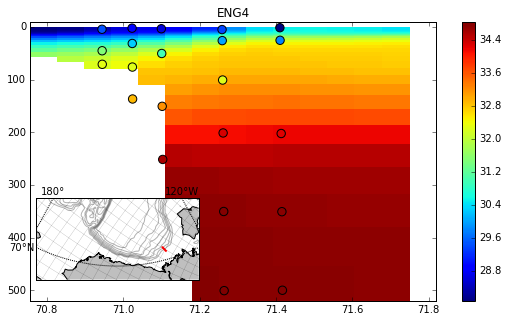

In [12]:
a_=300
b_=145

fig = plt.figure(figsize=(20,5))
ax=plt.subplot(121)
data=vel('S','2010m','ENG4') 

plt.pcolor(nav_lat[a_,b_:b_+15],dep,data[:,a_,b_:b_+15])
lat,lon,depth,sal,tem=filerdata(Data,a_,b_,special='True')
plt.scatter(lat,depth,c=sal,s=70);plt.colorbar()

plt.ylim(-10,520);plt.xlim(nav_lat[a_,b_],nav_lat[a_,b_+15])
plt.gca().invert_yaxis();plt.title('ENG4')
# add inset
axin = inset_axes(ax, width='40%', height='40%', loc=3)
m,x_lon,y_lat,nemo_lon,nemo_lat=map()
m.plot(x_lon,y_lat,c='r',lw=2)


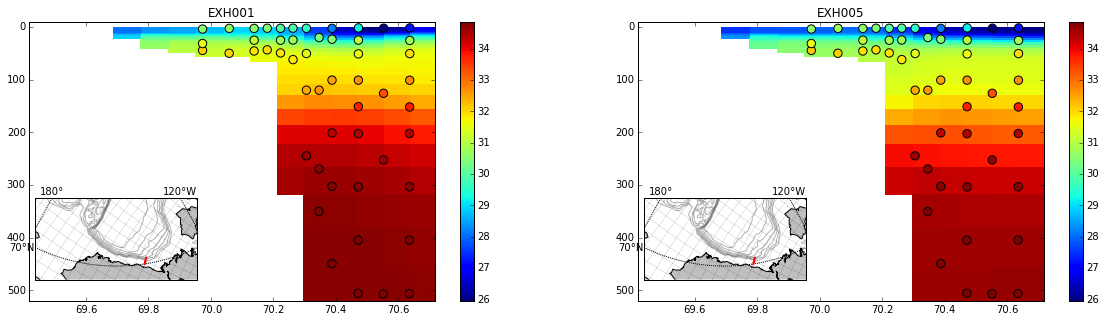

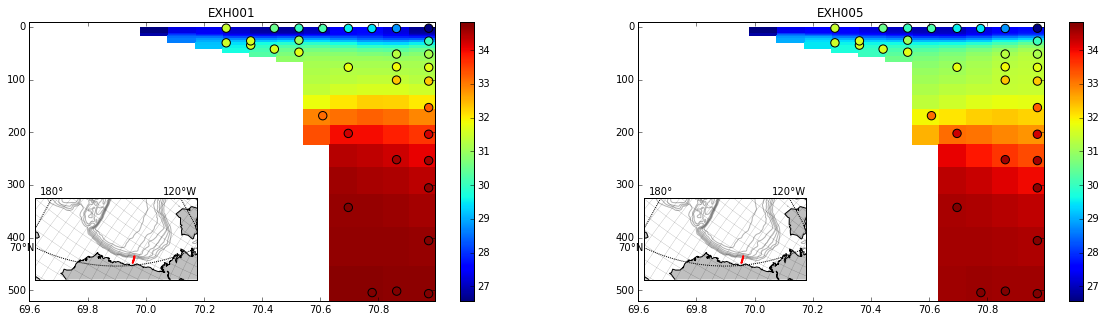

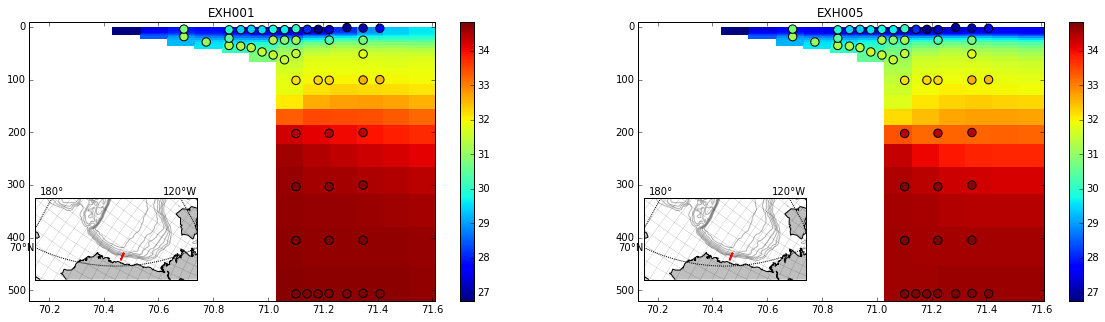

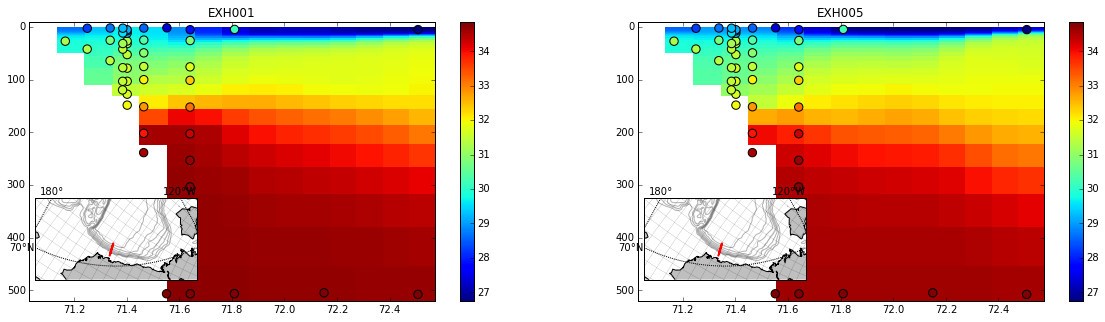

In [413]:
for i in range (len(a)):

    fig = plt.figure(figsize=(20,5))
    ax=plt.subplot(121)
    data=vel('S','2010m','EXH001') 

    plt.pcolor(nav_lat[a[i]:a[i]+15,b[i]],dep,data[:,a[i]:a[i]+15,b[i]])
    lat,lon,depth,sal,tem=filerdata(Data,a[i],b[i])
    plt.scatter(lat,depth,c=sal,s=70);plt.colorbar()

    plt.ylim(-10,520);plt.xlim(nav_lat[a[i]+15,b[i]],nav_lat[a[i],b[i]])
    plt.gca().invert_yaxis();plt.title('EXH001')
    # add inset
    axin = inset_axes(ax, width='40%', height='40%', loc=3)
    m,x_lon,y_lat,nemo_lon,nemo_lat=map()
    m.plot(x_lon,y_lat,c='r',lw=2)

    ax=plt.subplot(122)
    data=vel('S','2010m','EXH005') 

    plt.pcolor(nav_lat[a[i]:a[i]+15,b[i]],dep,data[:,a[i]:a[i]+15,b[i]])
    lat,lon,depth,sal,tem=filerdata(Data,a[i],b[i])
    plt.scatter(lat,depth,c=sal,s=70);plt.colorbar()

    plt.ylim(-10,520);plt.xlim(nav_lat[a[i]+15,b[i]],nav_lat[a[i],b[i]])
    plt.gca().invert_yaxis();plt.title('EXH005')
    # add inset
    axin = inset_axes(ax, width='40%', height='40%', loc=3)
    m,x_lon,y_lat,nemo_lon,nemo_lat=map()
    m.plot(x_lon,y_lat,c='r',lw=2)

001 has a better behavior. In 005, the mid layer is being pushed too deep.

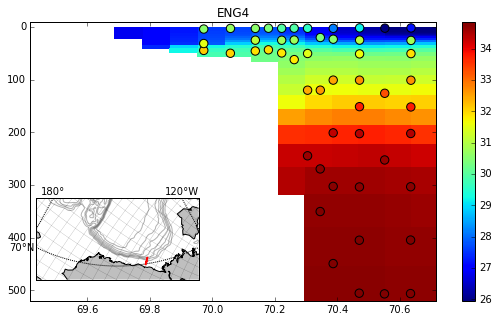

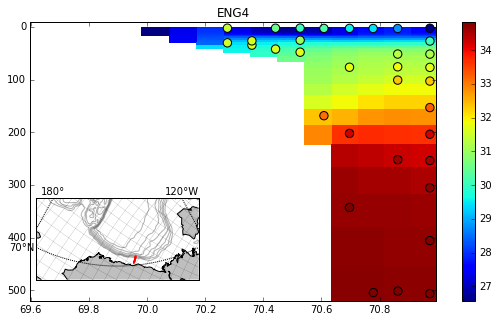

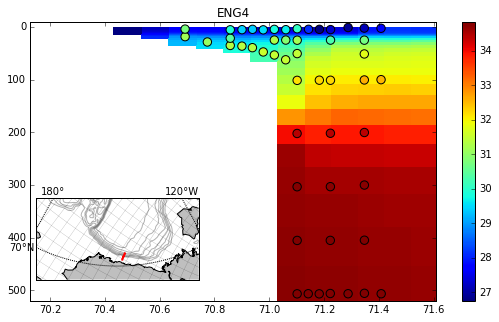

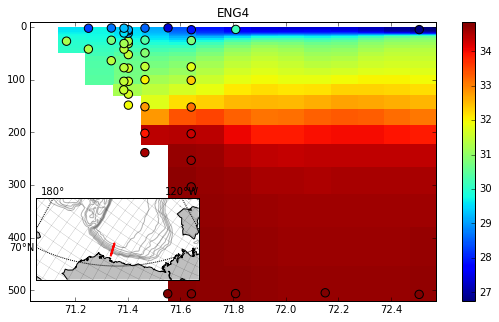

In [15]:
for i in range (len(a)):

    fig = plt.figure(figsize=(20,5))
    ax=plt.subplot(121)
    data=vel('S','2010m','ENG4') 

    plt.pcolor(nav_lat[a[i]:a[i]+15,b[i]],dep,data[:,a[i]:a[i]+15,b[i]])
    lat,lon,depth,sal,tem=filerdata(Data,a[i],b[i])
    plt.scatter(lat,depth,c=sal,s=70);plt.colorbar()

    plt.ylim(-10,520);plt.xlim(nav_lat[a[i]+15,b[i]],nav_lat[a[i],b[i]])
    plt.gca().invert_yaxis();plt.title('ENG4')
    # add inset
    axin = inset_axes(ax, width='40%', height='40%', loc=3)
    m,x_lon,y_lat,nemo_lon,nemo_lat=map()
    m.plot(x_lon,y_lat,c='r',lw=2)

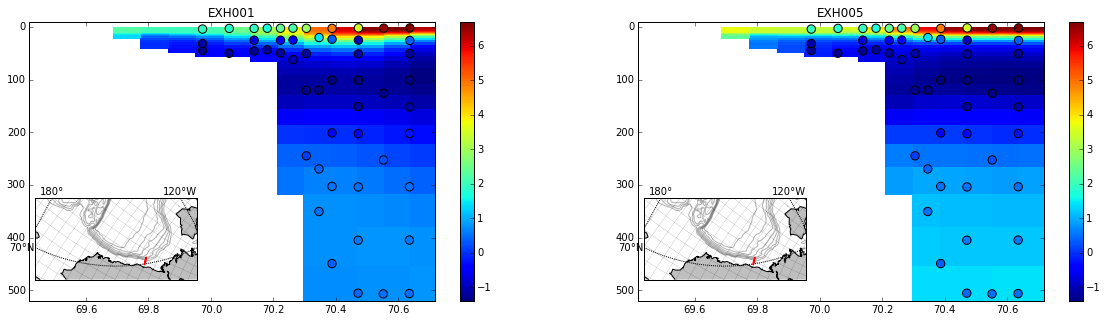

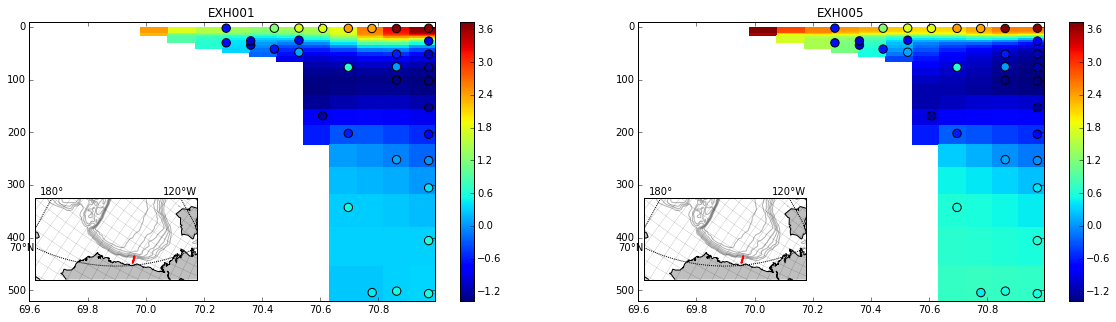

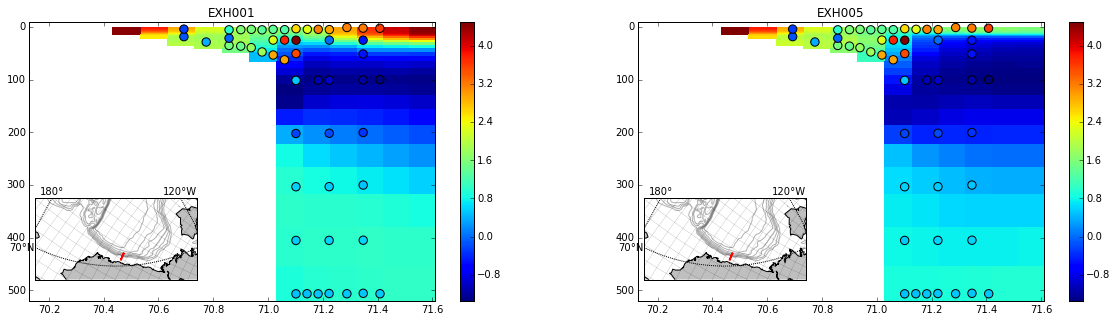

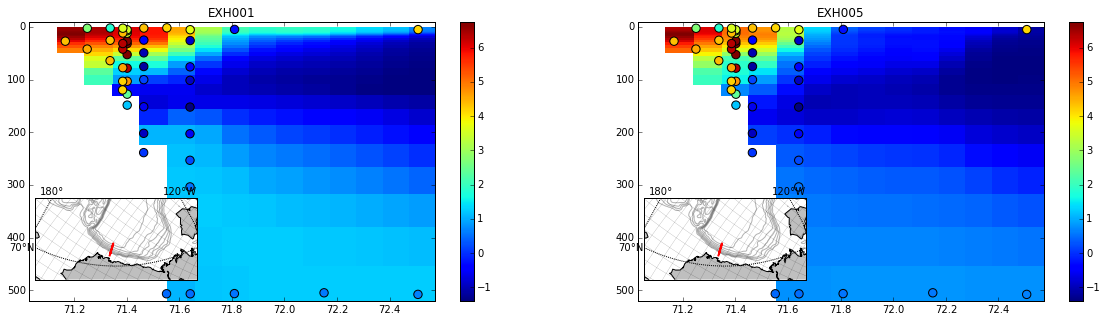

In [414]:
for i in range (len(a)):

    fig = plt.figure(figsize=(20,5))
    ax=plt.subplot(121)
    data=vel('T','2010m','EXH001') 

    plt.pcolor(nav_lat[a[i]:a[i]+15,b[i]],dep,data[:,a[i]:a[i]+15,b[i]])
    lat,lon,depth,sal,tem=filerdata(Data,a[i],b[i])
    plt.scatter(lat,depth,c=tem,s=70);plt.colorbar()

    plt.ylim(-10,520);plt.xlim(nav_lat[a[i]+15,b[i]],nav_lat[a[i],b[i]])
    plt.gca().invert_yaxis();plt.title('EXH001')
    # add inset
    axin = inset_axes(ax, width='40%', height='40%', loc=3)
    m,x_lon,y_lat,nemo_lon,nemo_lat=map()
    m.plot(x_lon,y_lat,lw=2,c='r')

    ax=plt.subplot(122)
    data=vel('T','2010m','EXH005') 

    plt.pcolor(nav_lat[a[i]:a[i]+15,b[i]],dep,data[:,a[i]:a[i]+15,b[i]])
    lat,lon,depth,sal,tem=filerdata(Data,a[i],b[i])
    plt.scatter(lat,depth,c=tem,s=70);plt.colorbar()

    plt.ylim(-10,520);plt.xlim(nav_lat[a[i]+15,b[i]],nav_lat[a[i],b[i]])
    plt.gca().invert_yaxis();plt.title('EXH005')
    # add inset
    axin = inset_axes(ax, width='40%', height='40%', loc=3)
    m,x_lon,y_lat,nemo_lon,nemo_lat=map()
    m.plot(x_lon,y_lat,lw=2,c='r')

    exh001: better in the 1st row. The deep layer is more real.
    
    also seems to be better in surface.. (2nd and 3rd rows.. )
    
    not as good as 005 in the last row

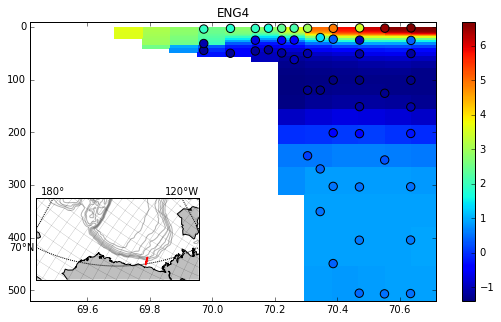

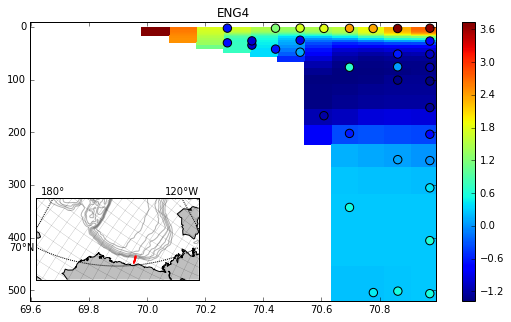

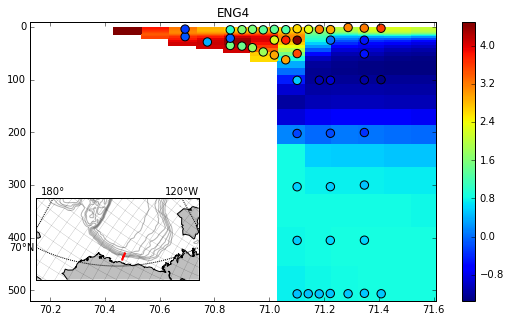

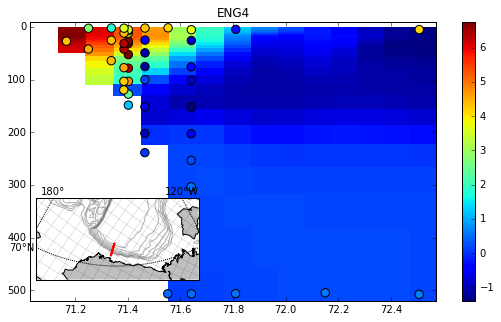

In [16]:
for i in range (len(a)):

    fig = plt.figure(figsize=(20,5))
    ax=plt.subplot(121)
    data=vel('T','2010m','ENG4') 

    plt.pcolor(nav_lat[a[i]:a[i]+15,b[i]],dep,data[:,a[i]:a[i]+15,b[i]])
    lat,lon,depth,sal,tem=filerdata(Data,a[i],b[i])
    plt.scatter(lat,depth,c=tem,s=70);plt.colorbar()

    plt.ylim(-10,520);plt.xlim(nav_lat[a[i]+15,b[i]],nav_lat[a[i],b[i]])
    plt.gca().invert_yaxis();plt.title('ENG4')
    # add inset
    axin = inset_axes(ax, width='40%', height='40%', loc=3)
    m,x_lon,y_lat,nemo_lon,nemo_lat=map()
    m.plot(x_lon,y_lat,lw=2,c='r')